# Nova Versão

In [ ]:
import pandas as pd

pareceres = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSDW5cLYIkrmgVX_S8roFA33f8qd23644HY5Y-L1oTlyUh4L5RnGHZI3GbRxk-CgkmXmlphJlq5RxJi/pub?gid=1178013539&single=true&output=csv',index_col='numero')
pareceres

,emissao,ementa,completo,parecer
numero,,,,
445,11-11-2021,"Entendemos ser a Lei Municipal 4.078-A/20, uma...",Consulta nº 445/21\n Assunto: Sobre Lei munici...,FALSO
123813,11-11-2021,O serviço de referência não pode negar atendim...,Consulta nº 123.813/21\n Assunto: Sobre as dis...,FALSO
126843,11-11-2021,Envio de prontuário médico através de site da ...,Consulta nº 126.843/21\n Assunto: Possibilidad...,FALSO
95300,11-11-2021,Sugere-se que a Comissão de Ética Médica do ho...,Consulta nº 95.300/21\n Assunto: Médicos plant...,VERDADEIRO
168548,11-11-2021,A vacinação dos adolescentes faz parte de estr...,Consulta nº 168.548/21\n Assunto: Vacinação de...,VERDADEIRO
...,...,...,...,...
76233,28-08-2007,Se o profissional médico juntamente com sua at...,Assunto: Médico responsável técnico em empresa...,NaN
23421,27-07-2004,Acreditamos ser necessário o pré-requisito de ...,Consulta nº 23.421/04\n Assunto: Prática de pe...,NaN
111584,00-00-2002,Perfil Profissiográfico Previdenciário (PPP),O\n presente Parecer Consulta busca atender a...,NaN


In [ ]:
# removendo pareceres sem identificação de solução
filtrados = pareceres.dropna()


dados=[]
tutores=[]

for index, row in filtrados.iterrows():
  linhas = row['completo'].split('\n')

  compostas = []
  for n in range(0,len(linhas)):
    for k in range(0,len(linhas)):
      if n != k:
          compostas.append( linhas[n] + '\n' + linhas[k] )

  dados.extend(compostas)


  if row['parecer'] == 'VERDADEIRO':
    tutores.extend([1] * len(compostas))
  else:
    tutores.extend([0] * len(compostas))

print(len(dados))
print((tutores))

78842
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# tokenização por bag-of-words
count_vect = CountVectorizer()
dados_tokens = count_vect.fit_transform(dados)


# frequencia dos tokens
tf_transformer = TfidfTransformer(use_idf=False)
dados_freq = tf_transformer.fit_transform(dados_tokens)




print('\n\nTokenização =',dados_tokens.shape)
print( "\ndados tokens\n", dados_tokens)



print('\nFrequência =',dados_freq.shape)
print( "\ndados freq\n", dados_freq)



Tokenização = (78842, 5485)

dados tokens
   (0, 23)	1
  (0, 102)	1
  (0, 134)	1
  (0, 206)	1
  (0, 758)	1
  (0, 1425)	1
  (0, 1635)	2
  (0, 2189)	1
  (0, 3241)	1
  (0, 3509)	1
  (0, 3587)	1
  (0, 3648)	2
  (0, 3697)	1
  (0, 3794)	1
  (0, 4324)	1
  (0, 4396)	1
  (0, 4848)	1
  (0, 4905)	1
  (0, 5187)	1
  (1, 134)	1
  (1, 206)	1
  (1, 1366)	1
  (1, 1425)	1
  (1, 3597)	1
  (1, 3648)	1
  :	:
  (78840, 2085)	1
  (78840, 2787)	1
  (78840, 3160)	1
  (78840, 3363)	1
  (78840, 3537)	1
  (78840, 3998)	1
  (78840, 4443)	1
  (78840, 4708)	1
  (78840, 5220)	1
  (78841, 6)	2
  (78841, 21)	1
  (78841, 45)	1
  (78841, 127)	2
  (78841, 315)	1
  (78841, 666)	1
  (78841, 1428)	1
  (78841, 1607)	1
  (78841, 1616)	1
  (78841, 1635)	1
  (78841, 2085)	2
  (78841, 2787)	1
  (78841, 3537)	2
  (78841, 3998)	1
  (78841, 4443)	2
  (78841, 4708)	2

Frequência = (78842, 5485)

dados freq
   (0, 23)	0.2
  (0, 102)	0.2
  (0, 134)	0.2
  (0, 206)	0.2
  (0, 758)	0.2
  (0, 1425)	0.2
  (0, 1635)	0.4
  (0, 2189)	0.2
  (0

[[ 0.43552913 -0.12022735]
 [ 0.02849445  0.00526399]
 [ 0.46567756  0.09301814]
 ...
 [ 0.10853642  0.16127548]
 [ 0.09265448  0.13383164]
 [ 0.2918925   0.11691598]]
78842


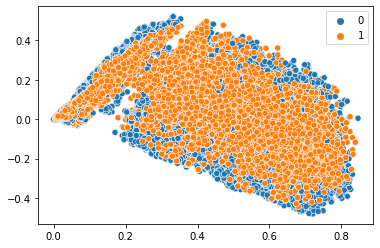

In [ ]:
from sklearn.decomposition import TruncatedSVD
import seaborn as sns

svd = TruncatedSVD(n_components=2)
Xp = svd.fit_transform(dados_freq)

print(Xp)

print(len(Xp))

_ = sns.scatterplot(x=Xp[:,0],y=Xp[:,1],hue=tutores)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import time


start = time.time()
parametros = {'alpha':uniform(loc=0.0, scale=4.0)}

clf = MultinomialNB()
busca = RandomizedSearchCV(clf, parametros, cv=100, scoring='accuracy',n_jobs=-1, random_state=42)
busca.fit(dados_freq, tutores)

print(pd.DataFrame(data=busca.cv_results_).sort_values('rank_test_score').head(1))
end = time.time()

print("Tempo de execução:", round(end - start, 5), "segundos")

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
6       0.104429      0.024462         0.001509        0.000113    0.232334   

                           params  split0_test_score  split1_test_score  \
6  {'alpha': 0.23233444867279784}           0.989861            0.87199   

   split2_test_score  split3_test_score  ...  split93_test_score  \
6           0.925222           0.940431  ...            0.998731   

   split94_test_score  split95_test_score  split96_test_score  \
6            0.975888             0.98731            0.989848   

   split97_test_score  split98_test_score  split99_test_score  \
6            0.988579            0.982234            0.961929   

   mean_test_score  std_test_score  rank_test_score  
6         0.967622         0.06753                1  

[1 rows x 109 columns]
Tempo de execução: 192.95625 segundos


In [ ]:
from sklearn.linear_model import SGDClassifier



start = time.time()
parametros = {'loss':['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
              'penalty':['l2', 'l1', 'elasticnet'],
              'alpha':uniform(loc=0.0, scale=4.0),
              'fit_intercept':[True,False],
              }

clf = SGDClassifier(random_state=42)
busca = RandomizedSearchCV(clf, parametros, cv=100, scoring='accuracy',n_jobs=-1, random_state=42)
busca.fit(dados_freq, tutores)


pd.DataFrame(data=busca.cv_results_).sort_values('rank_test_score').head(1)
end = time.time()

print("Tempo de execução:", round(end - start, 5), "segundos")

Tempo de execução: 361.58412 segundos


In [ ]:
from sklearn.ensemble import RandomForestClassifier



#start = time.time()
parametros = {'criterion':['gini', 'entropy', 'log_loss'],
              'max_features':['sqrt', 'log2', None],
              'class_weight':['balanced', 'balanced_subsample'],
              }

clf = RandomForestClassifier(max_depth=6,random_state=42)
busca = RandomizedSearchCV(clf, parametros, cv=10, scoring='accuracy',n_jobs=-1, random_state=42)
busca.fit(dados_freq, tutores)


pd.DataFrame(data=busca.cv_results_).sort_values('rank_test_score').head(1)
#end = time.time()

#print("Tempo de execução:", round(end - start, 5), "segundos")

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_criterion,param_class_weight,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
5,5.905109,0.690903,0.161863,0.018257,log2,entropy,balanced_subsample,"{'max_features': 'log2', 'criterion': 'entropy...",0.842105,0.871021,...,0.760781,0.827372,0.948884,0.823186,0.984145,0.989346,0.840309,0.857956,0.090099,1
